# Regression
## Batch gradient descent


In [95]:
import math
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA
from sklearn import cross_validation
import numpy as np
%matplotlib inline 

Here we assume we are in D-dimensional space and have M data points, and we choose N basis functions. 

In [2]:
X = []
t = []
text = open('regression_x_t.txt', 'r')
lines = text.readlines()
for line in lines:
    listOfLine = line.split(' ')
    X.append(float(listOfLine[0]))
    t.append(float(listOfLine[1]))
M = len(X)
D = 1

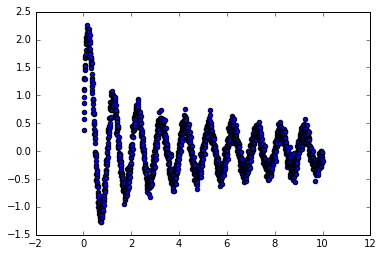

In [227]:
# Observe the data
plt.scatter(X, t)
plt.show()

Thus we choose Gaussian basis functions. For $N = 10$, $s = \frac{1}{N}$ and $\mu_j \in \{0, \dots, 9\}$ 

In [275]:
N = 10
s = 1
mu = []
for i in range(N):
    mu.append(i)

In [267]:
def phi(x, j):
    phix = math.exp(-(x-mu[j])**2/(2*s**2))
    return phix

In [268]:
def y(x, w):
    y = 0
    for j in range(N):
        y = y + phi(x, j)*w[j]
    return y

In [269]:
def batch_gradient_descent(X, t, w0, alpha, Accuracy):
    error = 1
    old_error = 1
    diff = 1
    errors = []
    w = w0
    n_iter = 0
    M_test = len(X)
    while diff > Accuracy:
        n_iter = n_iter + 1
        delta_f2 = []
        for i in range(N):
            sum_u = 0
            for j in range(M_test):
                #print j
                sum_u = sum_u + (y(X[j], w)-t[j])*phi(X[j], i)
            w[i] = w[i]- alpha*sum_u/M_test
        for i in range(M_test):
            delta_f2.append((y(X[i], w)-t[i])**2)
        error = LA.norm(delta_f2, 2)
        diff = (old_error-error)**2
        if n_iter%10 == 0:
            print error
        errors.append(error)
        old_error = error
    return w, errors

Prepare test data

In [44]:
xTrain, xTest, tTrain, tTest = cross_validation.train_test_split(X, t, 
                                                                 test_size=0.3, random_state = 0)

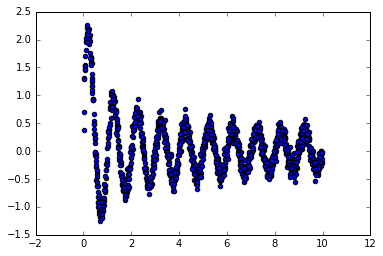

In [112]:
plt.scatter(xTrain, tTrain)
plt.show()

In [290]:
w0 = [0 for col in range(N)]

In [291]:
w, errors = batch_gradient_descent(xTrain, tTrain, w0, 10, 0.0001)

16.0667792954
15.0675883952
14.6503921981
14.4203166269
14.2505517037
14.1164584804


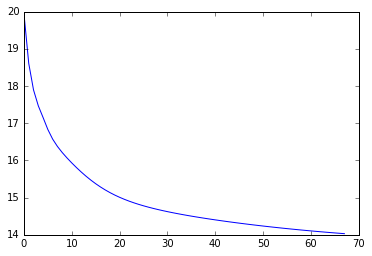

In [292]:
plt.plot(errors)
plt.show()

In [293]:
w

[3.05231226620816,
 -3.4163039684010004,
 2.7989190415944383,
 -2.1410654111189222,
 1.6621825558720107,
 -1.350067573092046,
 1.1140883804507566,
 -0.8393429837567032,
 0.5262027693074441,
 -0.22346587688364675]

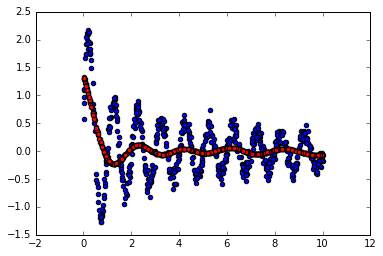

In [294]:
tPredit = []
sizeTest = len(tTest)
for i in range(sizeTest):
    tP = y(xTest[i], w)
    tPredit.append(tP)
plt.scatter(xTest, tTest)
plt.scatter(xTest, tPredit, c='red')
plt.show()

From the graph it's not very good. One possible reason is the basis function set chosen can't properly describe the data set. I even tried N=30, but the result was not good eithere. 

## One-step solution for minimizing sum-of-square error

In [295]:
Phi = [[0 for col in range(N)] for row in range(M)]
for i in range(M):
    for j in range(N):
        Phi[i][j] = phi(X[i], j)

In [296]:
mPhi = np.array(Phi)
mt = np.array(t)
ww = LA.solve(np.dot( np.transpose(mPhi),mPhi), np.dot( np.transpose(mt), mPhi))

In [297]:
ww

array([ 3.98713723, -4.83042287,  4.33647259, -3.52092163,  2.74739748,
       -2.10225354,  1.56284927, -1.07347657,  0.63487268, -0.25680549])

In [298]:
tw = np.array(w)
tw-ww

array([-0.93482496,  1.4141189 , -1.53755355,  1.37985622, -1.08521493,
        0.75218597, -0.44876089,  0.23413358, -0.10866991,  0.03333961])

From the result we can see two w got from different method are very near. 

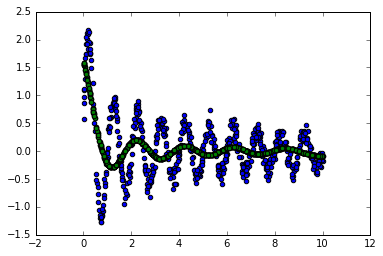

In [299]:
tPredit = []
sizeTest = len(tTest)
for i in range(sizeTest):
    tP = y(xTest[i], ww)
    tPredit.append(tP)
plt.scatter(xTest, tTest)
plt.scatter(xTest, tPredit, c='red')

tPredit1 = []
sizeTest = len(tTest)
for i in range(sizeTest):
    tP = y(xTest[i], w)
    tPredit1.append(tP)
plt.scatter(xTest, tPredit, c='green')

plt.show()

The result is similar to the result obtained in (1). 

## Neural Network for Regression
Use MLPRegressor in sklearn

In [314]:
M_Train = len(tTrain)
tPhi = [[0 for col in range(N)] for row in range(M_Train)]
for i in range(M_Train):
    for j in range(N):
        tPhi[i][j] = phi(xTrain[i], j)
        
mtPhi = np.array(tPhi)
mtt = np.array(tTrain)

In [316]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(alpha=0.001,hidden_layer_sizes=500,max_iter=1000) 
clf.fit( mtPhi, mtt) 
print clf.score( mtPhi, mtt) 
#print clf.score( np.transpose(mPhi), np.array(tTest))

0.857331446324


In [320]:
# validate
M_Test = len(tTest)
TPhi = [[0 for col in range(N)] for row in range(M_Test)]
for i in range(M_Test):
    for j in range(N):
        TPhi[i][j] = phi(xTest[i], j)
        
mTPhi = np.array(TPhi)
mTt = np.array(tTest)
print clf.score( mTPhi, mTt)

0.836835495818


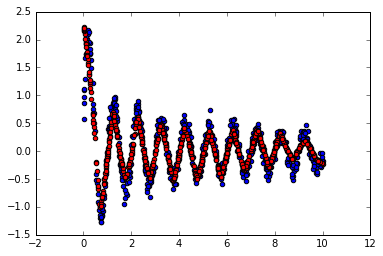

In [322]:
plt.scatter(xTest, tTest)
plt.scatter(xTest, clf.predict(mTPhi), c='red')
plt.show()

From the above cross-validated result and plot, we can see that neural network outperformed the previous predictors. 

## Apply neural network on a non-linear regression problem

In [346]:
X=[]
lX = []
t = []
text = open('Reg_Train.txt', 'r')
lines = text.readlines()
for line in lines:
    listOfLine = line.split(' ')
    for i in range(18):
        lX.append(float(listOfLine[i]))
    X.append(lX)
    t.append(float(listOfLine[-1]))

In [347]:
mX = np.array(X)
mt = np.array(t)

In [349]:
clf = MLPRegressor(alpha=0.01) 
clf.fit( mX, mt) 
print clf.score( mX, mt) 

-0.00126059127954


From the result, it's accurate. 

In [325]:
X_t = []
t_t = []
text_t = open('Reg_Test.txt', 'r')
lines_t = text_t.readlines()
for line in lines_t:
    listOfLine = line.split(' ')
    for i in range(18):
        X_t.append(float(listOfLine[i]))
    t_t.append(float(listOfLine[-1]))

In [330]:
mX_t = np.array(X_t)
mt_t = np.array(t_t)